## Final Project Submission

Please fill out:
* Student name: Deepali Sharma 
* Student pace: self paced / part time / full time   part time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:



In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#pd.set_option('display.max_rows', 10)
import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [85]:
#check for the NA values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [86]:
from datetime import date
from datetime import datetime
df['date']=pd.to_datetime(df['date'])
df['yr_sold']=df['date'].dt.year.astype('int')
df['age'] =df['yr_sold']-df['yr_built']
df[['date','yr_built','yr_sold','age']]

,date,yr_built,yr_sold,age
0,2014-10-13,1955,2014,59
1,2014-12-09,1951,2014,63
2,2015-02-25,1933,2015,82
3,2014-12-09,1965,2014,49
4,2015-02-18,1987,2015,28
...,...,...,...,...
21592,2014-05-21,2009,2014,5
21593,2015-02-23,2014,2015,1
21594,2014-06-23,2009,2014,5
21595,2015-01-16,2004,2015,11


In [87]:
df['grade_val']=df['grade'].str.split(" ", n = 1, expand = True)[0]
df['grade_val']=df['grade_val'].astype(str).astype(int)

In [88]:
heatmap_data=df.drop("id",axis=1)
heatmap_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,age,grade_val
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,7
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,7
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82,6
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,7
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5,8
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,1,8
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,5,7
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,11,8


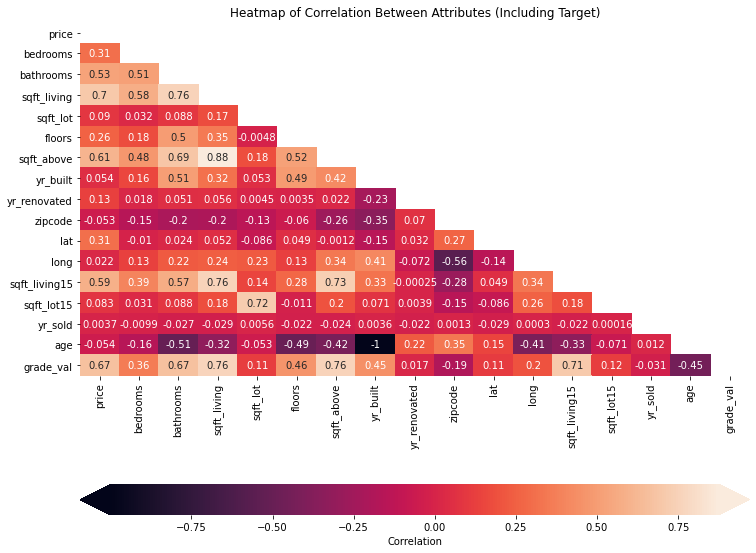

In [89]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
#heatmap_data = df[features_numeric]
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the heatmap, the most correalated feature with price is "sqft_living". This will be my most correlated
feature and will be the baseline model. 

Also sqft_living15 and sqft_lot15 are strongly correlated with sqft_living, sqft_lot respectively.
       use sqft_living, sqft_lot 
yr_built and age 
        use only age
sqft_above and sqft_living
       use sqft_living
        
Also drop grade and grade_val as they are strongly correlated with many othr features mentioned above    

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [91]:
#df[df["sqft_basement"]=='?']
df['sqft_basement'].replace(to_replace=['?'], value='-999',inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df['sqft_basement'].value_counts()

 0.0       12826
-999.0       454
 600.0       217
 500.0       209
 700.0       208
           ...  
 266.0         1
 1930.0        1
 588.0         1
 1920.0        1
 65.0          1
Name: sqft_basement, Length: 304, dtype: int64

In [92]:
df['sqft_basement'].replace(to_replace=0.0, value=1,inplace=True)
df['sqft_basement'].replace(to_replace=-999, value=2,inplace=True)
df['yr_renovated'].replace(to_replace=0.0, value=1,inplace=True)
df['yr_renovated']=df['yr_renovated'].fillna(2)
df['age'].replace(to_replace=0, value=0.01,inplace=True)
df['age'].replace(to_replace=-1, value=0.001,inplace=True)
#df['age'].value_counts()

In [93]:
#(df['yr_renovated']==0).sum()
df['yr_renovated'].value_counts()

1.0       17011
2.0        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [94]:
df['age'].value_counts()

9.000      472
8.000      443
11.000     431
0.010      430
10.000     428
          ... 
113.000     28
115.000     26
81.000      23
80.000      21
0.001       12
Name: age, Length: 117, dtype: int64

In [95]:
df['waterfront']  = df['waterfront'].fillna('NO')
df["view"]        = df["view"].fillna('UNKNOWN')

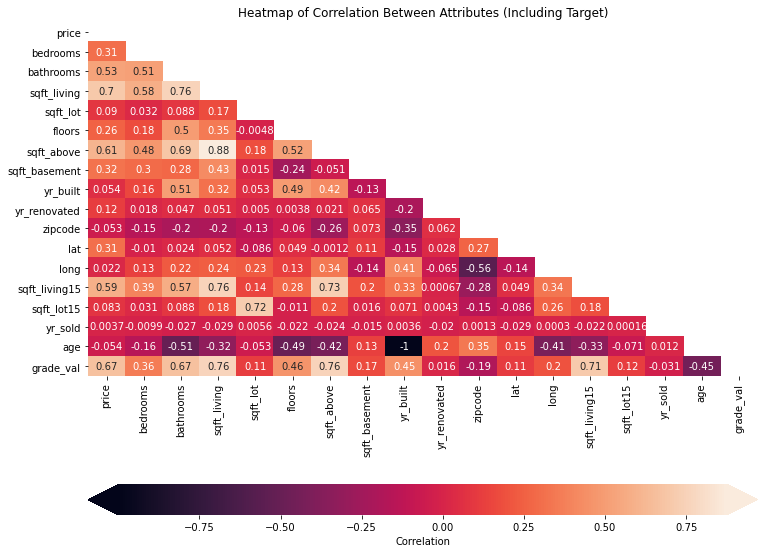

In [96]:
heatmap=df.drop("id",axis=1)

corr = heatmap.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [97]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yr_sold          0
age              0
grade_val        0
dtype: int64

In [100]:
features_numeric     = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',\
                        'sqft_basement','yr_renovated','zipcode',\
                        'yr_sold','age','grade_val']
features_categorical = ['waterfront','view','condition','grade']
features =   ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',\
              'sqft_basement','yr_renovated','zipcode','yr_sold','age','grade_val',\
              'waterfront','view','condition']

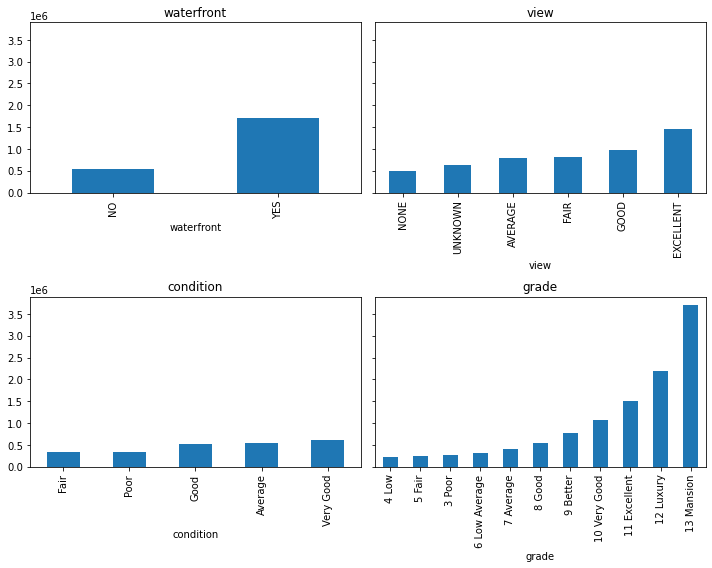

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8),sharey=True)

for col, ax in zip(features_categorical, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

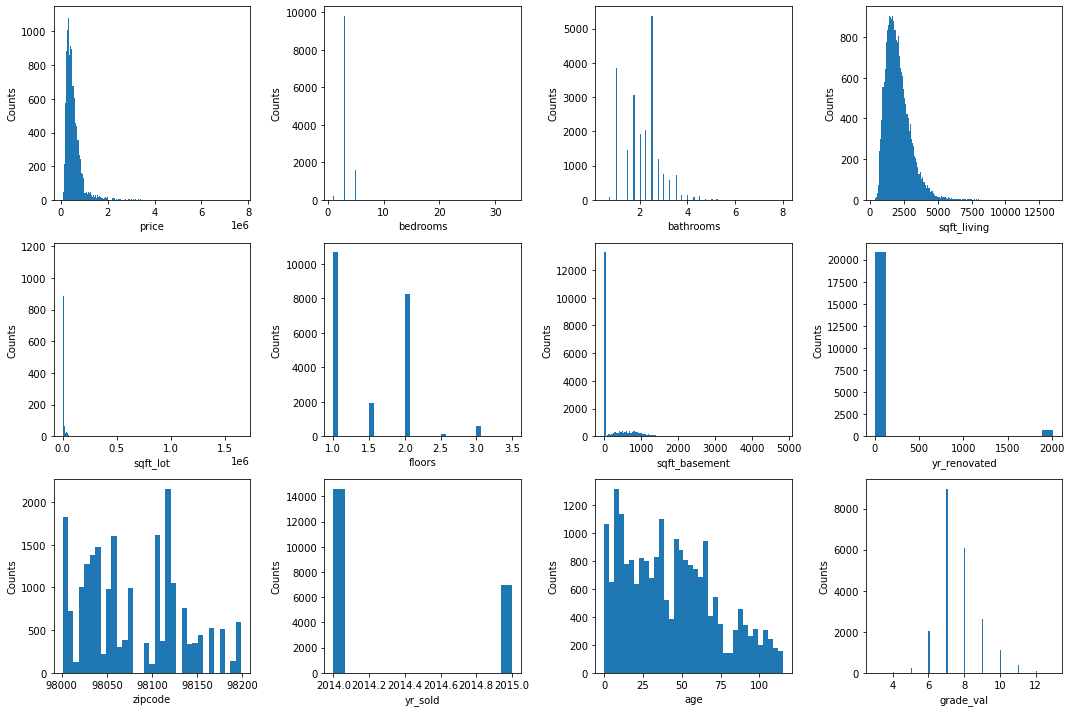

In [102]:
analyze_data=df[features_numeric]
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for index, col in enumerate(analyze_data.columns):
    ax = axes[index//4][index%4]
    ax.hist(analyze_data[col], bins='auto')
    ax.set_xlabel(col)
    ax.set_ylabel("Counts")

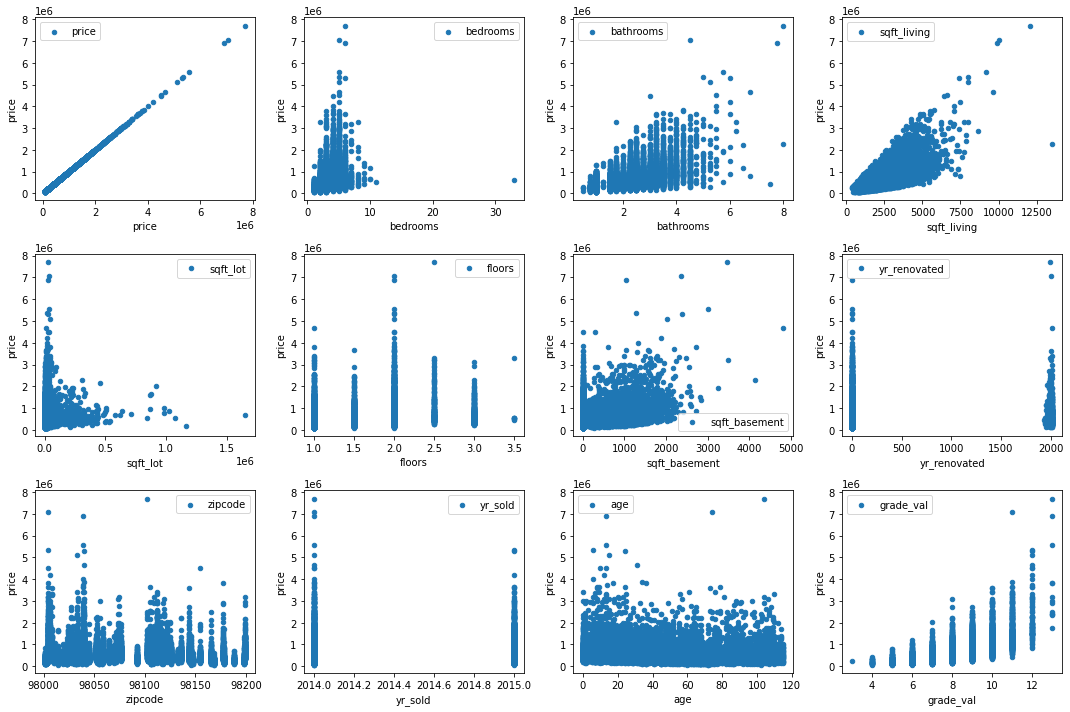

In [115]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for idx, col in enumerate(analyze_data.columns):
    analyze_data.plot(kind='scatter', x=col, y='price', ax=axes[idx//4][idx%4], label=col)
    #ax = axes[idx//4][idx%4]
    #ax.scatter(x=col, y='price')
    #ax.set_xlabel(col)
plt.legend()
plt.show()

In [116]:
log_data=df[features_numeric]
log_names = [f'{column}_log' for column in log_data.columns]

log_data = np.log(df[features_numeric])
log_data.columns = log_names


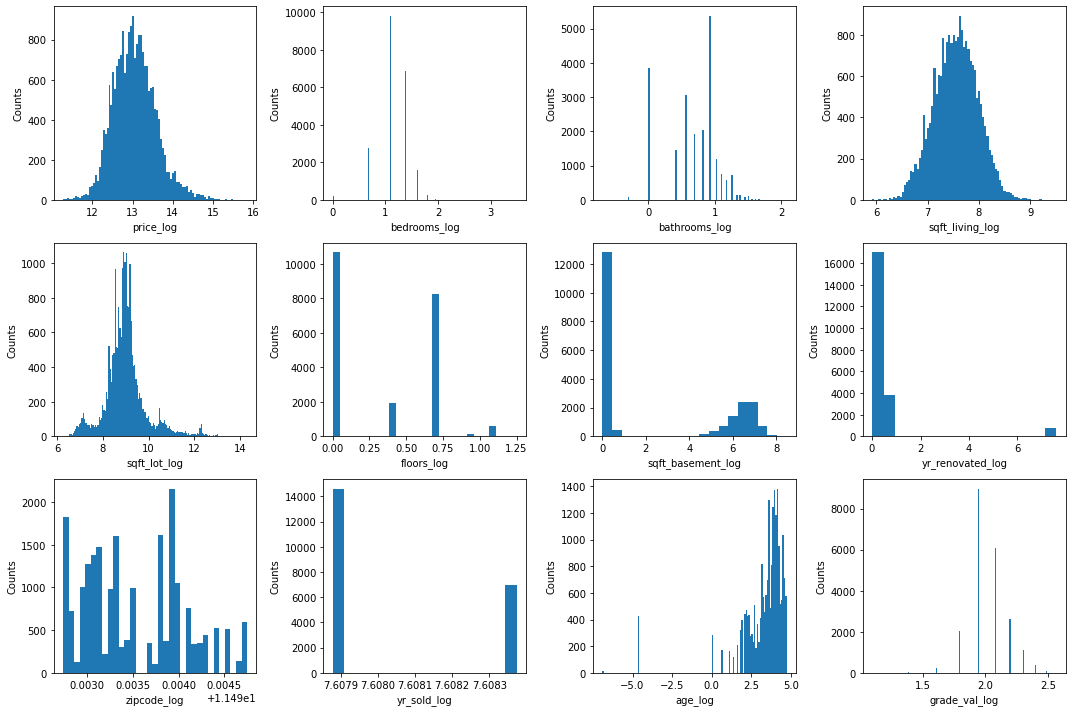

In [117]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for index, col in enumerate(log_data.columns):
    ax = axes[index//4][index%4]
    ax.hist(log_data[col], bins='auto')
    ax.set_xlabel(col)
    ax.set_ylabel("Counts")

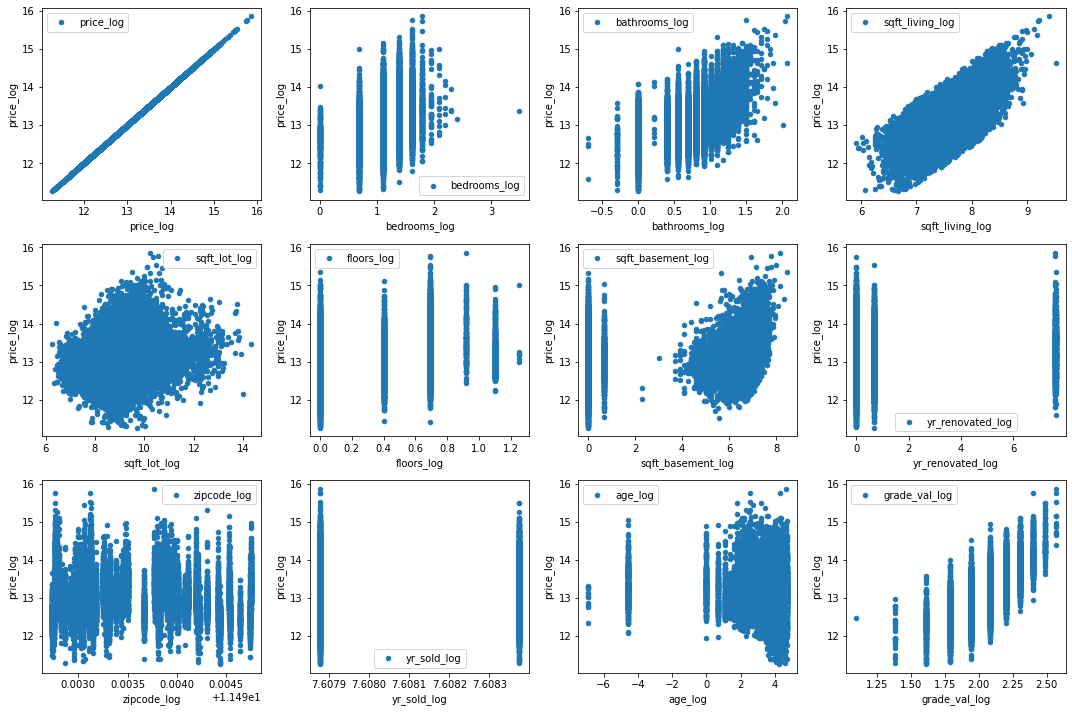

In [119]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
fig.set_tight_layout(True)

for idx, col in enumerate(log_data.columns):
    log_data.plot(kind='scatter', x=col, y='price_log', ax=axes[idx//4][idx%4], label=col)
plt.legend()
plt.show()

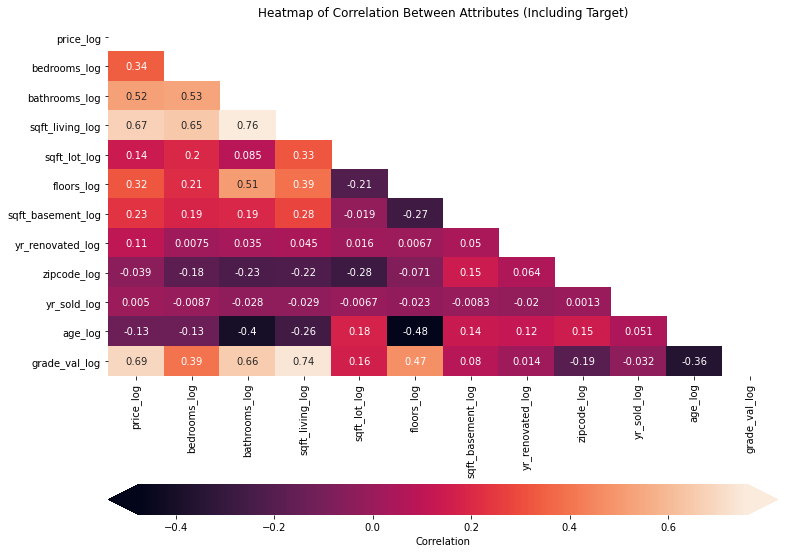

In [120]:
heatmap=log_data

corr = heatmap.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [107]:
most_correlated_feature = 'sqft_living_log'

In [150]:
X_categorical=df[['waterfront','view','condition']]

In [151]:
from sklearn.preprocessing import OrdinalEncoder

# (1) Create a variable street_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
waterfront_train = X_categorical[["waterfront"]]

# (2) Instantiate an OrdinalEncoder
encoder_waterfront = OrdinalEncoder()

# (3) Fit the encoder on street_train
encoder_waterfront.fit(waterfront_train)
#encoder_waterfront.fit_transform(waterfront_train.dropna().values.reshape(-1,1))

# Inspect the categories of the fitted encoder
encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [152]:
# (4) Transform frontage_missing_train using the encoder and
# assign the result to frontage_missing_encoded_train
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)

# Flatten for appropriate shape
waterfront_encoded_train = waterfront_encoded_train.flatten()

# Visually inspect frontage_missing_encoded_train
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [153]:
X_categorical["waterfront"] = waterfront_encoded_train

In [154]:
from sklearn.preprocessing import OneHotEncoder

# (1) Create a variable view_train
view_train = X_categorical[["view"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(view_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE', 'UNKNOWN'],
       dtype=object)]

In [155]:
view_encoded_train = ohe.transform(view_train)

# Visually inspect fireplace_qu_encoded_train
view_encoded_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [156]:
# (5a) Make the transformed data into a dataframe
view_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    view_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_categorical.index
)

# Visually inspect new dataframe
view_encoded_train

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,0.0,0.0,0.0,1.0,0.0
21594,0.0,0.0,0.0,0.0,1.0,0.0
21595,0.0,0.0,0.0,0.0,1.0,0.0


In [157]:
X_categorical.drop("view", axis=1, inplace=True)
X_categorical = pd.concat([X_categorical, view_encoded_train], axis=1)
X_categorical

,waterfront,condition,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN
0,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,Very Good,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
21592,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
21594,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0
21595,0.0,Average,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
condition_train = X_categorical[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe1 = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe1.fit(condition_train)

# Inspect the categories of the fitted encoder
ohe1.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [159]:
condition_encoded_train = ohe1.transform(condition_train)
condition_encoded_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [160]:
condition_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe1.categories_[0],
    # Set the index to match X_train's index
    index=X_categorical.index
)

# Visually inspect new dataframe
condition_encoded_train

,Average,Fair,Good,Poor,Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21592,1.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0
21594,1.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0


In [161]:
X_categorical.drop("condition", axis=1, inplace=True)
X_categorical = pd.concat([X_categorical, condition_encoded_train], axis=1)
X_categorical

,waterfront,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [162]:
preprocessed = pd.concat([log_data, X_categorical], axis=1)
preprocessed

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,sqft_basement_log,yr_renovated_log,zipcode_log,yr_sold_log,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
0,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,0.000000,0.000000,11.494537,7.607878,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,5.991465,7.596392,11.493997,7.607878,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,0.000000,0.693147,11.493008,7.608374,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,6.813445,0.000000,11.494110,7.607878,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,0.000000,0.000000,11.493478,7.608374,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.793859,1.098612,0.916291,7.333023,7.030857,1.098612,0.000000,0.000000,11.493773,7.607878,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21593,12.899220,1.386294,0.916291,7.745003,8.667852,0.693147,0.000000,0.000000,11.494211,7.608374,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21594,12.904459,0.693147,-0.287682,6.927558,7.207860,0.693147,0.000000,0.000000,11.494191,7.607878,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21595,12.899220,1.098612,0.916291,7.377759,7.778211,0.693147,0.000000,0.000000,11.492998,7.608374,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [163]:
most_correlated_feature="sqft_living_log"

In [164]:
X = preprocessed.drop(columns='price_log')
y = preprocessed['price_log']

X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [165]:
baseline_model = LinearRegression()

In [166]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms_log       16197 non-null  float64
 1   bathrooms_log      16197 non-null  float64
 2   sqft_living_log    16197 non-null  float64
 3   sqft_lot_log       16197 non-null  float64
 4   floors_log         16197 non-null  float64
 5   sqft_basement_log  16197 non-null  float64
 6   yr_renovated_log   16197 non-null  float64
 7   zipcode_log        16197 non-null  float64
 8   yr_sold_log        16197 non-null  float64
 9   age_log            16197 non-null  float64
 10  grade_val_log      16197 non-null  float64
 11  waterfront         16197 non-null  float64
 12  AVERAGE            16197 non-null  float64
 13  EXCELLENT          16197 non-null  float64
 14  FAIR               16197 non-null  float64
 15  GOOD               16197 non-null  float64
 16  NONE               

In [168]:
#features=['sqft_living','bedrooms','bathrooms','sqft_lot','floors',\
#              'sqft_basement','yr_renovated','zipcode','yr_sold','age','grade_val',\
#              'waterfront','view','condition']
features_2=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN']
X_train_second_model = X_train[features_2]

In [169]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.49348433990430735
Validation score: 0.49596841816417925

Baseline Model
Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [170]:
features_3=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
           'Average','Fair','Good','Poor','Very Good']
X_train_third_model = X_train[features_3]

In [171]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.49917707885863544
Validation score: 0.5025372733786906

Second Model
Train score:      0.49348433990430735
Validation score: 0.49596841816417925

Baseline Model
Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [173]:
features_4=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
           'Average','Fair','Good','Poor','Very Good','bedrooms_log','bathrooms_log','floors_log',\
            'sqft_basement_log','yr_renovated_log','yr_sold_log','age_log']
X_train_fourth_model = X_train[features_4]

In [174]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=X_train_fourth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5284106480106233
Validation score: 0.5309546762213702

Third Model
Train score:      0.49917707885863544
Validation score: 0.5025372733786906

Second Model
Train score:      0.49348433990430735
Validation score: 0.49596841816417925

Baseline Model
Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [190]:
#features_5=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
#           'Average','Fair','Good','Poor','Very Good','bedrooms_log','bathrooms_log','floors_log',\
#            'sqft_basement_log','yr_renovated_log','yr_sold_log','age_log','grade_val_log',
#            'sqft_lot_log','zipcode_log'
#           ]
features_5=['sqft_living_log','waterfront','AVERAGE','EXCELLENT','FAIR','GOOD','NONE','UNKNOWN',\
           'Average','Fair','Good','Poor','Very Good','bedrooms_log','bathrooms_log','floors_log',\
            'sqft_basement_log','yr_sold_log','age_log','grade_val_log',
            'sqft_lot_log','yr_renovated_log','zipcode_log'\
           ]
X_train_fifth_model = X_train[features_5]

In [202]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=X_train_fifth_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()
print("Fourth Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6136601702240412
Validation score: 0.615720804371342

Fourth Model
Train score:      0.5284106480106233
Validation score: 0.5309546762213702

Third Model
Train score:      0.49917707885863544
Validation score: 0.5025372733786906

Second Model
Train score:      0.49348433990430735
Validation score: 0.49596841816417925

Baseline Model
Train score:      0.45343610831579406
Validation score: 0.4595230000848154


In [184]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms_log: True
bathrooms_log: True
sqft_living_log: True
sqft_lot_log: True
floors_log: True
sqft_basement_log: True
yr_renovated_log: True
zipcode_log: True
yr_sold_log: True
age_log: True
grade_val_log: True
waterfront: True
AVERAGE: True
EXCELLENT: True
FAIR: True
GOOD: True
NONE: True
UNKNOWN: True
Average: True
Fair: True
Good: True
Poor: True
Very Good: True


In [196]:
X_train.describe()

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,sqft_basement_log,yr_renovated_log,zipcode_log,yr_sold_log,age_log,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
count,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,...,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,1.177621,0.677960,7.552376,8.990360,0.338810,2.508355,0.379839,11.493519,7.608038,3.303945,...,0.015126,0.015126,0.023338,0.900475,0.003025,0.649812,0.007964,0.261653,0.001111,0.079459
std,0.283701,0.392438,0.424240,0.904018,0.352543,3.152423,1.375282,0.000545,0.000232,1.475198,...,0.122059,0.122059,0.150978,0.299374,0.054921,0.477044,0.088890,0.439548,0.033319,0.270462
min,0.000000,-0.693147,5.913503,6.253829,0.000000,0.000000,0.000000,11.492733,7.607878,-6.907755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.098612,0.559616,7.265430,8.528726,0.000000,0.000000,0.000000,11.493059,7.607878,2.890372,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.098612,0.810930,7.555905,8.938532,0.405465,0.000000,0.000000,11.493386,7.607878,3.688879,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.386294,0.916291,7.847763,9.279866,0.693147,6.309918,0.000000,11.493916,7.608374,4.143135,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.397895,2.079442,9.513404,14.317109,1.252763,8.480529,7.608374,11.494751,7.608374,4.744932,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
X_train_fifth_model.describe()

,sqft_living_log,waterfront,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,...,bedrooms_log,bathrooms_log,floors_log,sqft_basement_log,yr_sold_log,age_log,grade_val_log,sqft_lot_log,yr_renovated_log,zipcode_log
count,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,...,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,7.552376,0.006853,0.042909,0.015126,0.015126,0.023338,0.900475,0.003025,0.649812,0.007964,...,1.177621,0.677960,0.338810,2.508355,7.608038,3.303945,2.024634,8.990360,0.379839,11.493519
std,0.424240,0.082502,0.202659,0.122059,0.122059,0.150978,0.299374,0.054921,0.477044,0.088890,...,0.283701,0.392438,0.352543,3.152423,0.000232,1.475198,0.148843,0.904018,1.375282,0.000545
min,5.913503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.693147,0.000000,0.000000,7.607878,-6.907755,1.098612,6.253829,0.000000,11.492733
25%,7.265430,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.098612,0.559616,0.000000,0.000000,7.607878,2.890372,1.945910,8.528726,0.000000,11.493059
50%,7.555905,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.098612,0.810930,0.405465,0.000000,7.607878,3.688879,1.945910,8.938532,0.000000,11.493386
75%,7.847763,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.386294,0.916291,0.693147,6.309918,7.608374,4.143135,2.079442,9.279866,0.000000,11.493916
max,9.513404,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.397895,2.079442,1.252763,8.480529,7.608374,4.744932,2.564949,14.317109,7.608374,11.494751


In [200]:
y_test

3686     11.794338
10247    12.936034
4037     13.110291
3437     12.779873
19291    13.314635
           ...    
18276    12.891692
15003    13.329378
13478    14.100690
18399    13.572802
2358     12.363076
Name: price_log, Length: 5400, dtype: float64

In [201]:
X_test

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,sqft_basement_log,yr_renovated_log,zipcode_log,yr_sold_log,age_log,...,EXCELLENT,FAIR,GOOD,NONE,UNKNOWN,Average,Fair,Good,Poor,Very Good
3686,1.098612,-0.287682,6.745236,9.056373,0.000000,5.521461,0.000000,11.494211,7.608374,4.248495,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10247,1.098612,0.000000,7.319865,8.713253,0.000000,6.476972,0.000000,11.493896,7.607878,4.304065,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4037,1.386294,0.810930,7.489971,10.645425,0.000000,6.429719,0.000000,11.493182,7.608374,3.465736,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3437,0.693147,0.405465,7.038784,7.824046,0.000000,6.234411,0.693147,11.493804,7.608374,3.295837,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19291,1.098612,0.000000,7.313220,8.273847,0.000000,6.214608,0.000000,11.493814,7.607878,4.204693,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,1.609438,0.000000,7.064759,8.818334,0.000000,5.913503,0.000000,11.493997,7.607878,4.248495,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15003,1.098612,0.559616,7.420579,8.536996,0.000000,6.522093,0.000000,11.494191,7.608374,4.110874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13478,1.386294,0.810930,8.089482,8.442470,0.693147,6.802395,0.000000,11.493865,7.608374,4.682131,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
18399,1.386294,1.609438,8.669056,9.540076,0.693147,7.635304,0.000000,11.493151,7.608374,3.091042,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


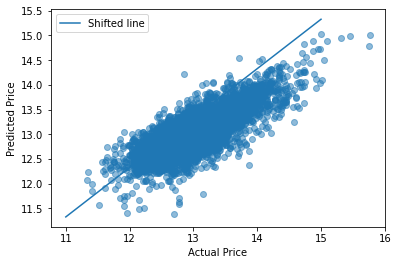

In [260]:
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
#perfect_line1 = np.reshape(perfect_line,(y_test.min(),y_test.max()))
#ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.plot(range(int(y_test.min()), int(y_test.min())+len(perfect_line)), perfect_line, label='Shifted line')
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

In [261]:
y_test.max()

15.769955609469426

In [262]:
preds

array([12.36399499, 12.67596974, 12.75041058, ..., 13.88454919,
       14.13351343, 12.86922138])

In [263]:
perfect_line = np.arange(y_test.min(), y_test.max())
perfect_line

array([11.32659589, 12.32659589, 13.32659589, 14.32659589, 15.32659589])

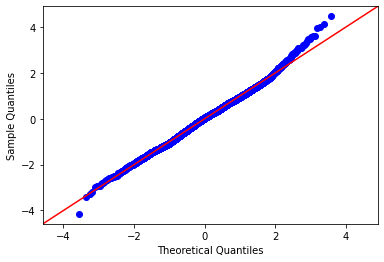

In [265]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [206]:
import scipy.stats as stats
import statsmodels.api as sm

In [207]:
smodel=sm.OLS(y_train, sm.add_constant(X_train)).fit()
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1227.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:46:47   Log-Likelihood:                -4902.9
No. Observations:               16197   AIC:                             9850.
Df Residuals:                   16175   BIC:                         1.002e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -997.8466     76.571    -13.032      0.000   -1147.934    -847.760
bedrooms_log         -0.1465      0.012    -11.853      0.000      -0.171      -0.122
bathrooms_log        -0.0586      0.012     -5.063      0.000      -0.081      -0.036
sqft_living_log       0.5090      0.014     35.912      0.000       0.481       0.537
sqft_lot_log         -0.0354      0.004     -9.635      0.000      -0.043      -0.028
floors_log            0.0854      0.011      7.723      0.000       0.064       0.107
sqft_basement_log     0.0093      0.001      8.840      0.000       0.007       0.011
yr_renovated_log      0.0225      0.002     11.703      0.000       0.019       0.026
zipcode_log          62.4698      5.260     11.876      0.000      52.159      72.780
yr_sold_log          85.7162     11.155      7.684      0.000      63.852     107.581
age_log               0.0309      0.002     14.105      0.000       0.027       0.035
grade_val_log         1.6231      0.028     57.190      0.000       1.567       1.679
waterfront            0.3944      0.038     10.363      0.000       0.320       0.469
AVERAGE            -166.3146     12.762    -13.032      0.000    -191.329    -141.300
EXCELLENT          -166.1403     12.762    -13.018      0.000    -191.156    -141.125
FAIR               -166.2414     12.762    -13.026      0.000    -191.256    -141.227
GOOD               -166.2600     12.762    -13.028      0.000    -191.275    -141.245
NONE               -166.4361     12.761    -13.043      0.000    -191.449    -141.423
UNKNOWN            -166.4542     12.762    -13.043      0.000    -191.469    -141.439
Average            -199.6151     15.314    -13.035      0.000    -229.633    -169.597
Fair               -199.6716     15.315    -13.038      0.000    -229.690    -169.653
Good               -199.5392     15.314    -13.030      0.000    -229.556    -169.523
Poor               -199.6056     15.314    -13.034      0.000    -229.624    -169.588
Very Good          -199.4150     15.314    -13.022      0.000    -229.432    -169.398
==============================================================================
Omnibus:                       39.127   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.278
Skew:                           0.096   Prob(JB):                     1.09e-09
Kurtosis:                       3.157   Cond. No.                     1.63e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [270]:
10**(-997.8466)

0.0

In [268]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, fifth_model.predict(X_test), squared=False)

0.331875485937116

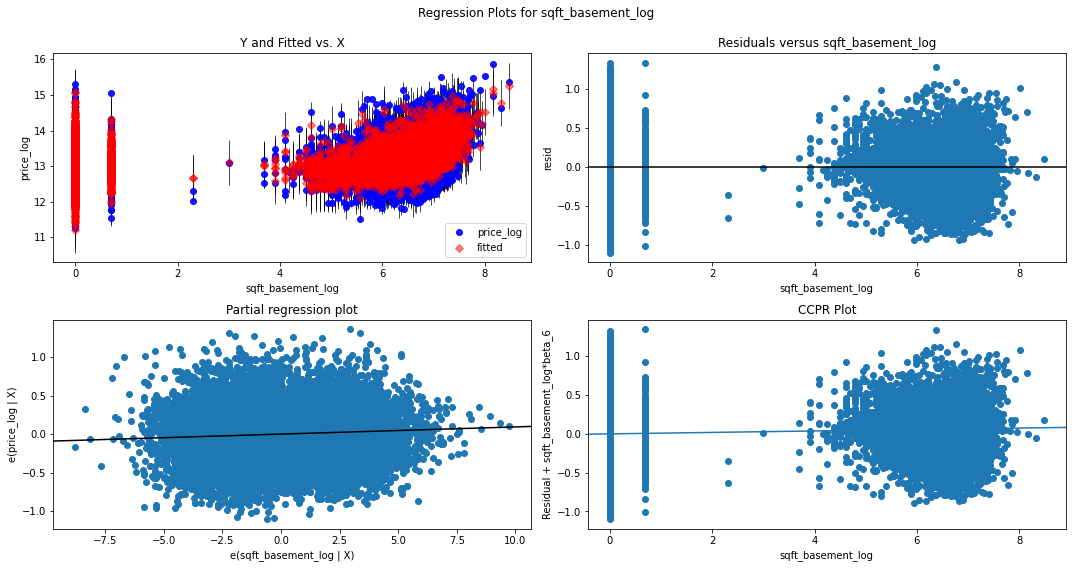

In [275]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(smodel, 'sqft_basement_log', fig=fig)
plt.show()